#Assignment #6: Opinion and discourse analysis

### Karim Kanji IA-20
#### 13.3.2023


In [21]:
#@title Depedencies

!pip install requests
!pip install beautifulsoup4
!pip install spacy
!python -m spacy download en_core_web_sm

# Note for this assignment vader sentiment analysis tool will work great!
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-14 10:48:04.766675: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-14 10:48:04.766859: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_

In [12]:
#@title Imports
import requests
from bs4 import BeautifulSoup
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [20]:
#@title Article and person
# Input article and person to be analyzed:
# Example article: https://www.bbc.com/news/world-us-canada-52012049
article_link = input("Enter the news article link: ")
person_name = input("Enter the name of the specific person: ")


# Enter the link and then Donald Trump (negative) / Andrew Yang (positive):

Enter the news article link: https://www.bbc.com/news/world-us-canada-52012049
Enter the name of the specific person: Andrew Yang


In [22]:
#@title Main code
# Data scraping:
response = requests.get(article_link)
soup = BeautifulSoup(response.text, 'html.parser')
article_text = soup.get_text()

# Load the spaCy entity recognition model
nlp = spacy.load("en_core_web_sm")

# Identification
doc = nlp(article_text)
entities = [entity.text for entity in doc.ents if entity.label_ == "PERSON"]


# Split the article text and create sentiments for specifik person
article_sentences = article_text.split('.')
sentiment = []

# Vader sentiment analysis
analyzer = SentimentIntensityAnalyzer()
sentiment_score = analyzer.polarity_scores(article_text)

for sentence in article_sentences:
    if person_name in sentence:
        sentiment_scores = analyzer.polarity_scores(sentence)
        sentiment.append(sentiment_scores['compound'])

# print(sentiment_score)
# print(person_sentiments)
# Final block of code that prints the evaluation depending on the sentiment 
# towards a person which is based
# on the sentiment score (either positive, negative or neutral)
if len(sentiment) > 0:
    avg_sentiment = sum(sentiment) / len(sentiment)
    if avg_sentiment > 0:
        print(f"The article is praising/supporting/positive towards {person_name}.")
    elif avg_sentiment < 0:
        print(f"The article criticizes/opposes/negative towards {person_name}.")
    else:
        print(f"The article has a neutral sentiment about {person_name}.")
else:
    print(f"The text does not mention {person_name}.")

The article is praising/supporting/positive towards Andrew Yang.


I got the following anwser which i sort of agree with after reading the article.
Being a real article ofcourse the author has taken some amount of caution while writing it, but nontheless the facts brought up conserning trump are definetly negative or critizising in nature, for example the following quote:

#### "*His compulsion for hype - declaring the combination of hydroxycholoroquine and azithromycin "one of the biggest game-changers in the history of medicine," even as medical officials warn against offering false hope.*

#### *His lack of empathy. Rather than soothing words for relatives of those who have died, or words of encouragement and appreciation for those in the medical trenches, Trump's daily White House briefings commonly start with a shower of self-congratulation."*

The anwser i got:    
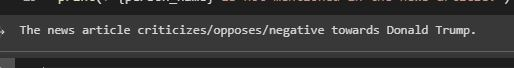

I also got positive for Andrew Yang due to the slightly positive things mentioned about him in the article:
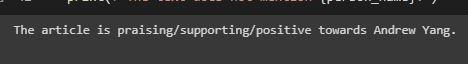